In [1]:
import os

In [2]:
from __future__ import print_function
import random, numpy as np
import keras, tensorflow as tf

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

tf.config.list_physical_devices('GPU')

[]

In [4]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [7]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [10]:
set_seed(12345)

model = Sequential()

model.add(Conv2D(32, (5, 5), strides=(2, 2), padding='same',
                 input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        2432      
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 288)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               147968    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                      

In [11]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)

model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6116 - accuracy: 0.4210 - val_loss: 1.4953 - val_accuracy: 0.4699
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2824 - accuracy: 0.5412 - val_loss: 1.2304 - val_accuracy: 0.5583
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1380 - accuracy: 0.6003 - val_loss: 1.1238 - val_accuracy: 0.6015
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0353 - accuracy: 0.6378 - val_loss: 1.1205 - val_accuracy: 0.6067
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9549 - accuracy: 0.6666 - val_loss: 1.0384 - val_accuracy: 0.6387
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8838 - accuracy: 0.6913 - val_loss: 1.0680 - val_accuracy: 0.6324
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8219 - accuracy: 0.7128 - val_loss: 0.9869 - val_accuracy:

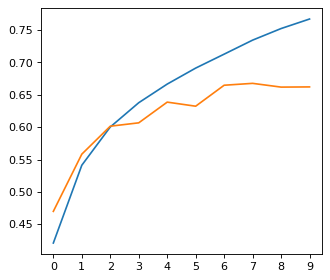

In [20]:
fig = plt.figure(figsize=(10, 4), dpi=80)
ax = fig.add_subplot(1, 2, 1)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.set_title('Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('epoch')
ax.


In [13]:
model2 = Sequential()

model2.add(Conv2D(32, (5, 5), strides=(2, 2), padding='same', 
                  input_shape=x_train.shape[1:], activation='relu'))
# model2.add()

In [19]:
x_train.shape[1:]

(32, 32, 3)